Iteración  x_n                  f(x_n)               Error               
----------------------------------------------------------------------
0          1.5000000000         0.2500000000         0.2500000000        
1          1.4166666667         0.0069444444         0.0069444444        
2          1.4142156863         0.0000060073         0.0000060073        
3          1.4142135624         0.0000000000         0.0000000000        

Raíz encontrada después de 3 iteraciones: 1.4142135623746899


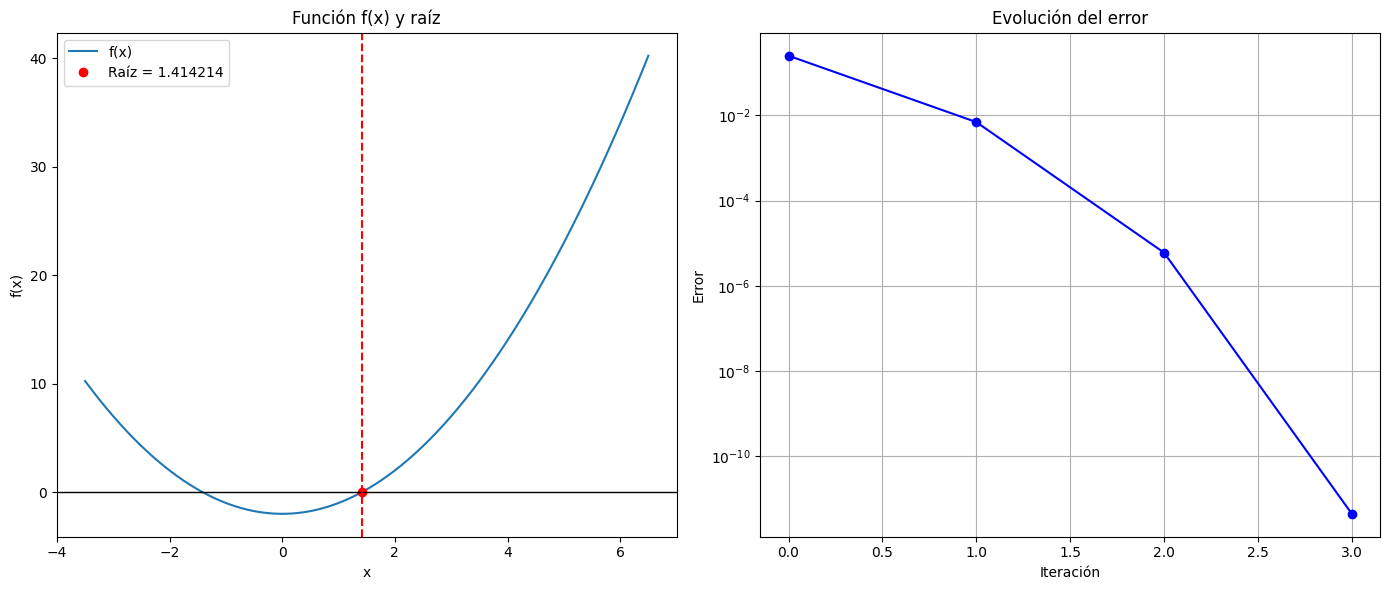


La raíz aproximada es: 1.4142135623746899


In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def newton_raphson(f_expr, x0, tolerance=1e-7, max_iterations=1000):
    """
    Implementación del método de Newton-Raphson para encontrar la raíz de una función.

    :param f_expr: La expresión simbólica de la función de la cual se desea encontrar la raíz.
    :param x0: Valor inicial de la raíz (aproximación inicial).
    :param tolerance: La tolerancia para detener la iteración (valor por defecto: 1e-7).
    :param max_iterations: Número máximo de iteraciones permitidas (valor por defecto: 1000).
    :return: La aproximación de la raíz.
    """
    x = sp.symbols('x')  # Definimos el símbolo 'x'
    
    # Convertir la expresión simbólica en una función evaluable
    f = sp.lambdify(x, f_expr, 'numpy')
    
    # Derivar la función simbólica y convertirla en una función evaluable
    f_prime_expr = sp.diff(f_expr, x)
    f_prime = sp.lambdify(x, f_prime_expr, 'numpy')
    
    x_n = x0
    errors = []
    values = []
    
    print(f"{'Iteración':<10} {'x_n':<20} {'f(x_n)':<20} {'Error':<20}")
    print("-" * 70)
    
    for n in range(max_iterations):
        f_x_n = f(x_n)
        f_prime_x_n = f_prime(x_n)
        
        # Calculamos el error (diferencia con la iteración anterior)
        error = abs(f_x_n)
        errors.append(error)
        values.append(x_n)
        
        print(f"{n:<10} {x_n:<20.10f} {f_x_n:<20.10f} {error:<20.10f}")
        
        if error < tolerance:
            print(f"\nRaíz encontrada después de {n} iteraciones: {x_n}")
            break
        
        if f_prime_x_n == 0:
            print("La derivada es cero. El método no puede continuar.")
            return None, None
        
        x_n = x_n - f_x_n / f_prime_x_n
    else:
        print("Número máximo de iteraciones alcanzado. El método no convergió.")
    
    # Graficar la función y el error en la misma ventana
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Graficar la función con la raíz en la primera subgráfica
    x_vals = np.linspace(x0 - 5, x0 + 5, 400)
    f_vals = [f(xi) for xi in x_vals]
    
    ax[0].plot(x_vals, f_vals, label="f(x)")
    ax[0].plot(x_n, f(x_n), 'ro', label=f"Raíz = {x_n:.6f}")  # Punto rojo en la raíz
    ax[0].axhline(0, color='black',linewidth=1)
    ax[0].axvline(x_n, color='red', linestyle='--')
    ax[0].set_title("Función f(x) y raíz")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("f(x)")
    ax[0].legend()

    # Graficar la evolución del error en la segunda subgráfica
    ax[1].plot(range(len(errors)), errors, marker='o', linestyle='-', color='b')
    ax[1].set_yscale('log')  # Escala logarítmica para observar mejor la convergencia
    ax[1].set_xlabel('Iteración')
    ax[1].set_ylabel('Error')
    ax[1].set_title('Evolución del error')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()
    
    return x_n, errors

# Definimos la función simbólica y el valor inicial
x = sp.symbols('x')
f_expr = x**2 - 2  # Función f(x) = x^2 - 2
x0 = 1.5

# Ejecutamos el método de Newton-Raphson
raiz, errores = newton_raphson(f_expr, x0)

if raiz is not None:
    print(f"\nLa raíz aproximada es: {raiz}")
